#  Sales Data Analysis & Forecasting
Domain: Retail | Regression & Time Series Analysis

This project analyzes sales trends, seasonality, and predicts future sales using regression models.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


In [2]:
# Load dataset
df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Product_Category,Discount_Percent,Revenue
0,2019-01-01,Electronics,0,1268.81
1,2019-01-01,Clothing,0,951.89
2,2019-01-01,Home & Kitchen,0,717.90
3,2019-01-02,Electronics,10,1619.05
4,2019-01-02,Clothing,0,861.91


##  Monthly Sales Trend

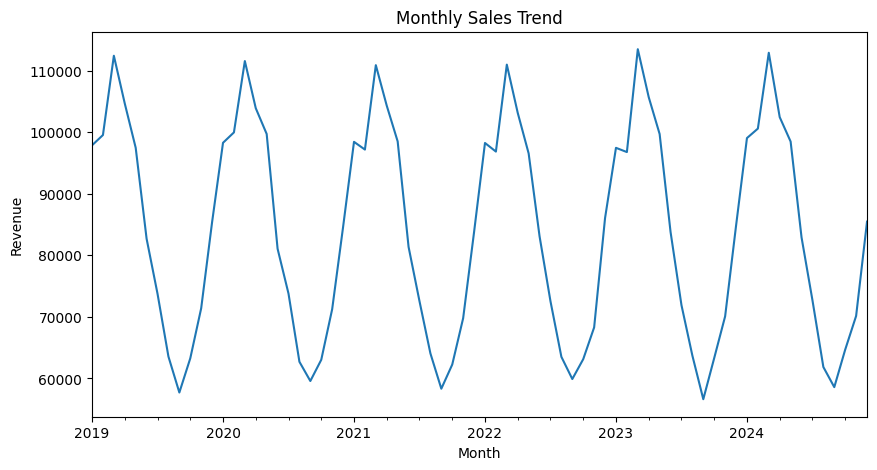

In [3]:
# Create monthly sales trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Revenue'].sum()
monthly_sales.plot(figsize=(10,5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

##  Seasonality Analysis

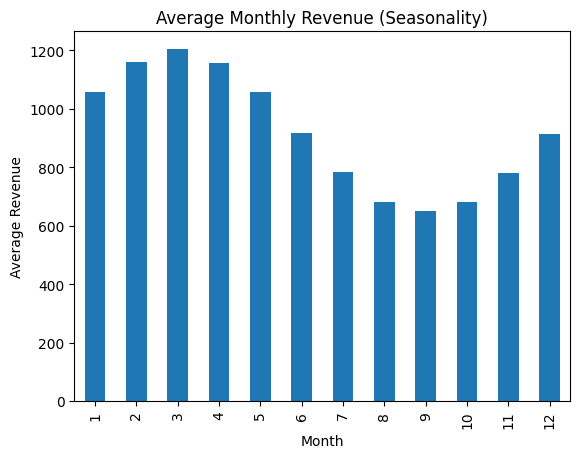

In [4]:
# Seasonality by month
df['Month_Num'] = df['Date'].dt.month
seasonality = df.groupby('Month_Num')['Revenue'].mean()
seasonality.plot(kind='bar', title='Average Monthly Revenue (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.show()

##  Correlation: Discount vs Sales

In [5]:
# Correlation analysis
correlation = df[['Discount_Percent', 'Revenue']].corr()
correlation

,Discount_Percent,Revenue
Discount_Percent,1.000000,0.158268
Revenue,0.158268,1.000000


##  Sales Prediction using Regression

In [6]:
# Feature engineering
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

X = df[['Discount_Percent', 'Day', 'Month', 'Year']]
y = df['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


##  Model Evaluation

In [7]:
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print('MAE:', round(mae, 2))
print('RMSE:', round(rmse, 2))

MAE: 263.81
RMSE: 316.22
